## Lab Case Study

We received a new file with different columns and some more info to work with. This file was previously cleaned.

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
import statistics

### Import file

In [2]:
file4 = pd.read_csv('Data/file4.csv')
file4

,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,central,4809,no,basic,college,2/18/11,feb,employed,m,48029,...,52,0,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize
1,west region,2228,no,basic,college,1/18/11,jan,unemployed,f,92260,...,26,0,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize
2,east,14947,no,basic,bachelor,2/10/11,feb,employed,m,22139,...,31,0,2,personal auto,personal l3,offer3,call center,480,suv,medsize
3,north west,22332,yes,extended,college,1/11/11,jan,employed,m,49078,...,3,0,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize
4,north west,9025,no,premium,bachelor,1/17/11,jan,medical leave,f,23675,...,31,0,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,15563,no,premium,bachelor,1/19/11,jan,unemployed,f,61541,...,40,0,7,personal auto,personal l1,offer3,web,1214,luxury car,medsize
10685,north west,5259,no,basic,college,1/6/11,jan,employed,f,61146,...,68,0,6,personal auto,personal l3,offer2,branch,273,four-door car,medsize
10686,central,23893,no,extended,bachelor,2/6/11,feb,employed,f,39837,...,63,0,2,corporate auto,corporate l3,offer1,web,381,luxury suv,medsize
10687,west region,11971,no,premium,college,2/13/11,feb,employed,f,64195,...,27,4,6,personal auto,personal l1,offer1,branch,618,suv,medsize


In [3]:
file4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10689 entries, 0 to 10688
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   region                         10689 non-null  object
 1   customer_lifetime_value        10689 non-null  int64 
 2   response                       10689 non-null  object
 3   coverage                       10689 non-null  object
 4   education                      10689 non-null  object
 5   effective_to_date              10689 non-null  object
 6   month                          10689 non-null  object
 7   employment_status              10689 non-null  object
 8   gender                         10689 non-null  object
 9   income                         10689 non-null  int64 
 10  location_code                  10689 non-null  object
 11  marital_status                 10689 non-null  object
 12  monthly_premium_auto           10689 non-null  int64 
 13  m

Description of some columns:

- **Inception** refers to the actual date that an insurance policy begins. Upon inception, a policyholder has coverage in accordance with the terms of their insurance policy.

### Plotting

#### Response rate

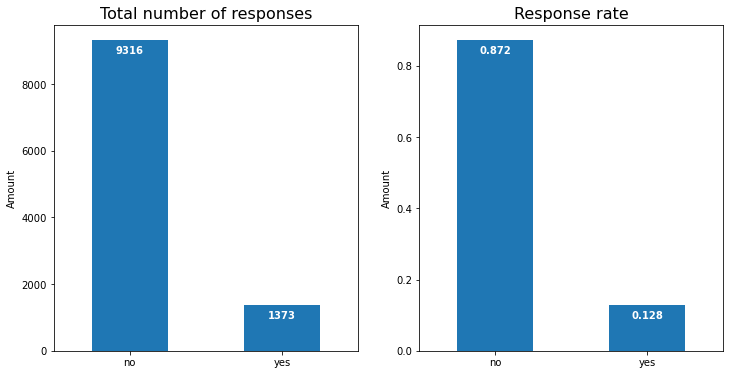

In [4]:
fig, axes = plt.subplots(1,2, figsize=(12,6))

file4['response'].value_counts().plot.bar(rot=0, ax=axes[0])

axes[0].bar_label(axes[0].containers[0], padding=-15, c='white', weight='demi')
axes[0].set_ylabel('Amount')
axes[0].set_title('Total number of responses', fontsize=16)

file4['response'].value_counts(normalize=True).plot.bar(rot=0, ax=axes[1])

axes[1].bar_label(axes[1].containers[0], fmt='%.3f', padding=-15, c='white', weight='demi')
axes[1].set_ylabel('Amount')
axes[1].set_title('Response rate', fontsize=16)


plt.show()

#### Response rate by sales channel

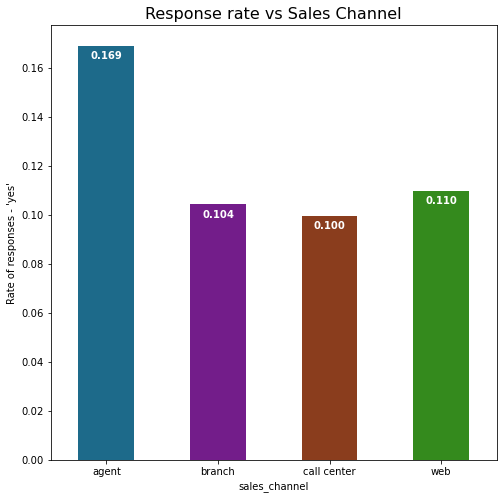

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

file4.groupby('sales_channel')['response'].value_counts(
    normalize=True).unstack()['yes'].plot.bar(rot=0, ax=ax,
                                              color=['#1D6A8A', '#731D8A', '#8A3D1D', '#348A1D'])

ax.bar_label(ax.containers[0], fmt='%.3f',
             padding=-15, c='white', weight='demi')
ax.set_ylabel("Rate of responses - 'yes'")
ax.set_title('Response rate vs Sales Channel', fontsize=16)
plt.show()

Total response:
```python
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
sns.countplot(x='sales_channel', hue='response', data=file4)
ax.set_ylabel('Amount of responses')
ax.set_title('Total number of responses vs Sales Channel')
plt.show()
```

#### Response rate by total claim amount

 As there are too many values in the <font color='orange'>**Total Claim Amount**</font> column (continuous variable), it makes sense to group the data before plotting them.

In [6]:
labels = ['Low', 'Medium', 'High']
claim_amount_binned, bins = pd.qcut(
    file4['total_claim_amount'], q=3, labels=labels, retbins=True)
display(bins)

response_claim = pd.concat(
    [file4['response'], claim_amount_binned], axis=1)
response_claim

array([   0.,  312.,  494., 2893.])

,response,total_claim_amount
0,no,Low
1,no,High
2,no,Medium
3,yes,Medium
4,no,High
...,...,...
10684,no,High
10685,no,Low
10686,no,Medium
10687,no,High


In [7]:
%%html
<style>
  table {margin-left: 0 !important;}
</style>

For reference:

|        Bin       |  Label |
|:----------------:|:------:|
| (0.098, 312.0]   | Low    |
| (312.0, 494.4]   | Medium |
| (494.4, 2893.24] | High   |

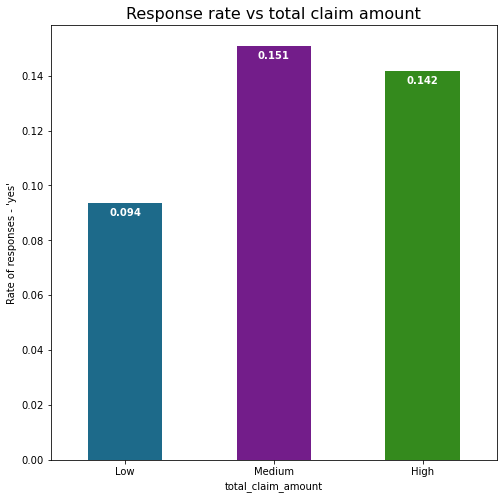

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

response_claim.groupby('total_claim_amount')['response'].value_counts(
    normalize=True).unstack()['yes'].plot.bar(rot=0, ax=ax,
                                              color=['#1D6A8A', '#731D8A', '#348A1D'])

ax.bar_label(ax.containers[0], fmt='%.3f',
             padding=-15, c='white', weight='demi')
ax.set_ylabel("Rate of responses - 'yes'")
ax.set_title('Response rate vs total claim amount', fontsize=16)
plt.show()

For total responses:
```python
fig, ax = plt.subplots(1,1, figsize=(8,8))
sns.countplot(x='total_claim_amount', hue='response', data=response_claim)
ax.set_ylabel('Total amount of responses')
ax.set_title('Total amount of responses by total claim amount')
plt.show()
```

#### Response rate by income

Like in the previous step, we should group the data in <font color='orange'>**Income**</font> before plotting.

In [9]:
income_binned, bins = pd.qcut(file4['income'], q=3, labels=labels, retbins=True)
display(bins)

response_income = pd.concat([file4['response'], income_binned], axis=1)
response_income

array([10037.        , 35625.        , 64217.33333333, 99981.        ])

,response,income
0,no,Medium
1,no,High
2,no,Low
3,yes,Medium
4,no,Low
...,...,...
10684,no,Medium
10685,no,Medium
10686,no,Medium
10687,no,Medium


For reference:

|        Bin       |  Label |
|:----------------:|:------:|
| (10075, 35625]   | Low    |
| (35635, 64217.33]| Medium |
| (64217.33, 99981]| High   |

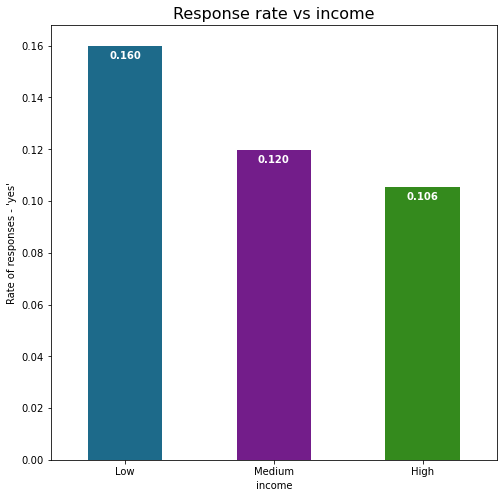

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

response_income.groupby('income')['response'].value_counts(
    normalize=True).unstack()['yes'].plot.bar(rot=0, ax=ax,
                                              color=['#1D6A8A', '#731D8A', '#348A1D'])

ax.bar_label(ax.containers[0], fmt='%.3f',
             padding=-15, c='white', weight='demi')
ax.set_ylabel("Rate of responses - 'yes'")
ax.set_title('Response rate vs income', fontsize=16)
plt.show()

**Categorical vs numerical**

Let's split the data into numerical and categorical columns to proceed with the analysis.

In [11]:
numericals = file4.select_dtypes(include='number').drop(
    columns={'months_since_last_claim', 'number_of_open_complaints', 'number_of_policies'})
numericals

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,total_claim_amount
0,4809,48029,61,52,292
1,2228,92260,64,26,744
2,14947,22139,100,31,480
3,22332,49078,97,3,484
4,9025,23675,117,31,707
...,...,...,...,...,...
10684,15563,61541,253,40,1214
10685,5259,61146,65,68,273
10686,23893,39837,201,63,381
10687,11971,64195,158,27,618


In [12]:
categoricals = file4.select_dtypes(include='object').drop(
    columns={'coverage', 'education', 'vehicle_size'})
categoricals

,region,response,effective_to_date,month,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class
0,central,no,2/18/11,feb,employed,m,suburban,married,corporate auto,corporate l3,offer3,agent,four-door car
1,west region,no,1/18/11,jan,unemployed,f,suburban,single,personal auto,personal l3,offer4,call center,four-door car
2,east,no,2/10/11,feb,employed,m,suburban,single,personal auto,personal l3,offer3,call center,suv
3,north west,yes,1/11/11,jan,employed,m,suburban,single,corporate auto,corporate l3,offer2,branch,four-door car
4,north west,no,1/17/11,jan,medical leave,f,suburban,married,personal auto,personal l2,offer1,branch,four-door car
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,no,1/19/11,jan,unemployed,f,suburban,married,personal auto,personal l1,offer3,web,luxury car
10685,north west,no,1/6/11,jan,employed,f,urban,married,personal auto,personal l3,offer2,branch,four-door car
10686,central,no,2/6/11,feb,employed,f,rural,married,corporate auto,corporate l3,offer1,web,luxury suv
10687,west region,no,2/13/11,feb,employed,f,urban,divorced,personal auto,personal l1,offer1,branch,suv


In [13]:
ordinals = file4[['months_since_last_claim', 'number_of_open_complaints',
                  'number_of_policies', 'coverage', 'education', 'vehicle_size']]

In [14]:
ordinals

,months_since_last_claim,number_of_open_complaints,number_of_policies,coverage,education,vehicle_size
0,7,0,9,basic,college,medsize
1,3,0,1,basic,college,medsize
2,34,0,2,basic,bachelor,medsize
3,10,0,2,extended,college,medsize
4,33,0,7,premium,bachelor,medsize
...,...,...,...,...,...,...
10684,12,0,7,premium,bachelor,medsize
10685,7,0,6,basic,college,medsize
10686,11,0,2,extended,bachelor,medsize
10687,0,4,6,premium,college,medsize


#### Heatmap

Let's check the correlation between pairs of numerical variables.

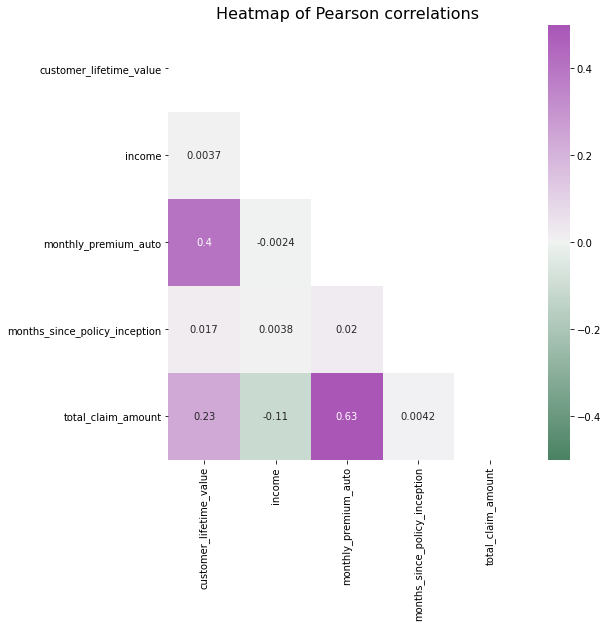

In [15]:
corr = numericals.corr() # returns a dataframe with the correlation values
matrix = np.triu(corr) # sets all the values of the lower triangle (under the main diagonal) to 0 (= False)
palette = sns.diverging_palette(145, 300, s=60, as_cmap=True)

fig, ax = plt.subplots(1,1, figsize=(8,8))
plt.title('Heatmap of Pearson correlations', fontsize=16)
sns.heatmap(
    corr,  # the data for the heatmap
    annot=True,  # show the actual values of correlation
    cmap=palette,
    center=0,  # specify the value at which to center the colormap
    fmt='.2g', # specify the format for the annotation 
    mask=matrix, # hides the values where mask = True (= upper triangle)
    vmax=.5,
    vmin=-.5)
plt.show()

None of the variables showed a high linear correlation. The best correlation is between <font color='orange'>**Total Claim Amount**</font> and <font color='orange'>**Monthly Premium Auto**</font> (0.63). Also, there are no signs of multicollinearity.

#### Checking for normality

We'll plot the distribution of the numeric variables to visually check for normallity.

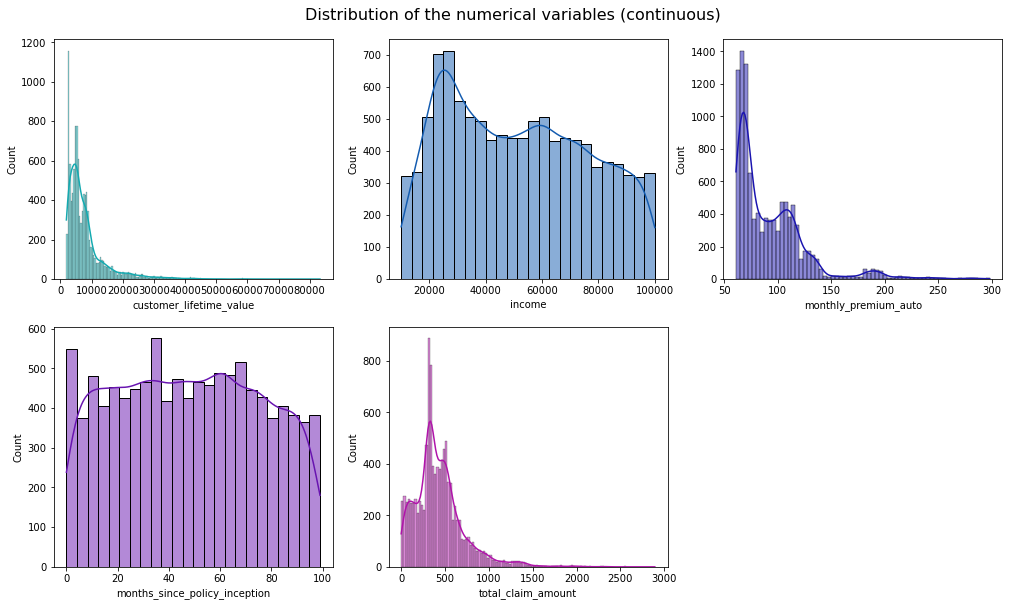

In [16]:
plt.figure(figsize = (17, 15))
colors = ['#14b068','#14aab0','#145cb0','#1a14b0','#6814b0','#b014aa']
plt.suptitle('Distribution of the numerical variables (continuous)',
            fontsize=16, y=0.91)

for i, col in enumerate(numericals.columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(x=col, data=numericals, color=colors[i], kde=True)

It looks like there are no normally distributed features, but that perception can change after removing outliers, for example.

## Activities

### Part 6

- [ ] X-y split.
- [ ] Normalize (numerical).
- [ ] One Hot/Label Encoding (categorical).

WEEK 7

Instructions
* In this lab, we will model our data. Import sklearn train_test_split and separate the data.
* Try a simple linear regression with all the data to see whether we are getting good results.
* Great! Now define a function that takes a list of models and train (and tests) them so we can try a lot of them without repeating code.
* Use the function to check LinearRegressor,Lasso,Ridge and KNeighborsRegressor.
* Use feature selection techniques to select subset of features to train the model with(if necessary).
* Check and discuss the results.